In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
 
import warnings
warnings.filterwarnings('ignore')

In [5]:
dataset_path = '/Users/syedmuhammadaskari/Desktop/untitled folder/calculas/iris.data'
data_features_name = [
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'
]
df = pd.read_csv(dataset_path, header=None, names=data_features_name)

In [7]:
target:int=[]
for i in range(0,df['class'].count(),+1):
   if df['class'][i]=='Iris-setosa' :
    target.append(0)
   elif df['class'][i]=='Iris-virginica':
    target.append(2)
   else:
    target.append(3)

df['target']=target

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,class,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


## Doing Eda on The DataSet

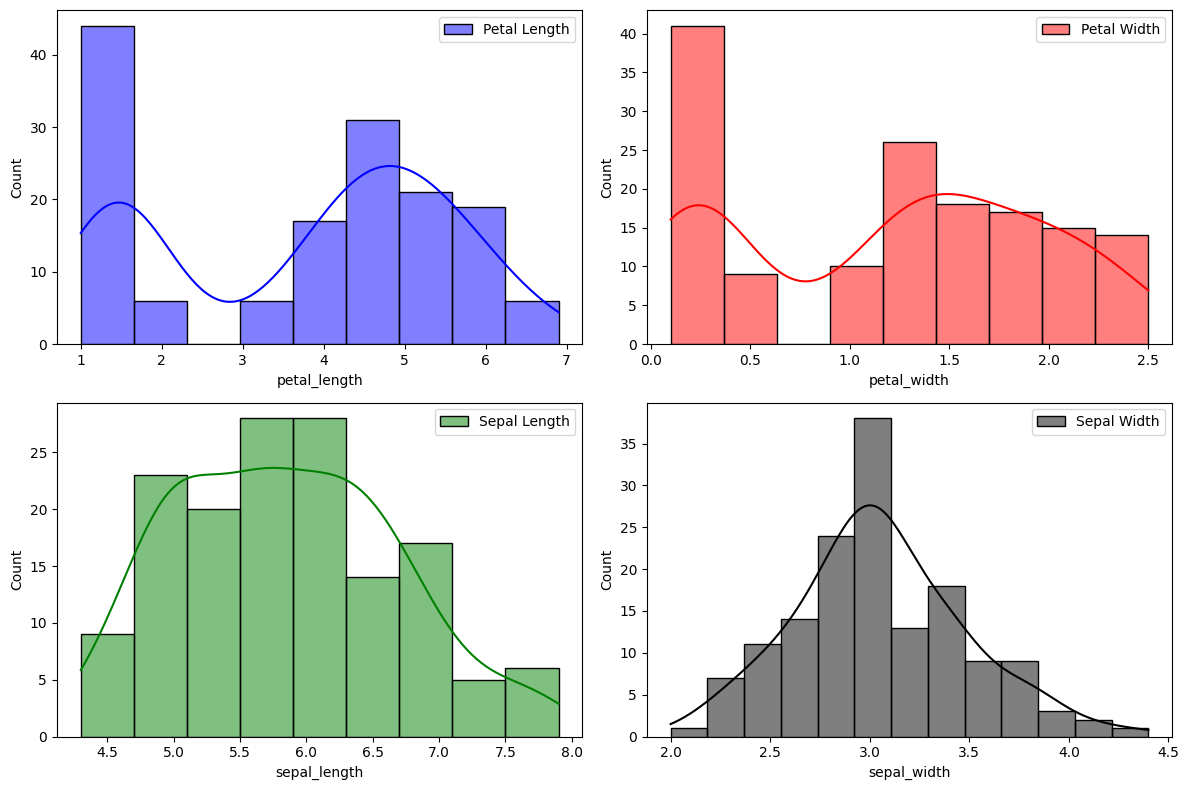

In [9]:
## EDA OF DataSet 

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['petal_length'], kde=True, color='blue', label='Petal Length')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(df['petal_width'], kde=True, color='red', label='Petal Width')
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(df['sepal_length'], kde=True, color='green', label='Sepal Length')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(df['sepal_width'], kde=True, color='black', label='Sepal Width')
plt.legend()

plt.tight_layout()
plt.show()

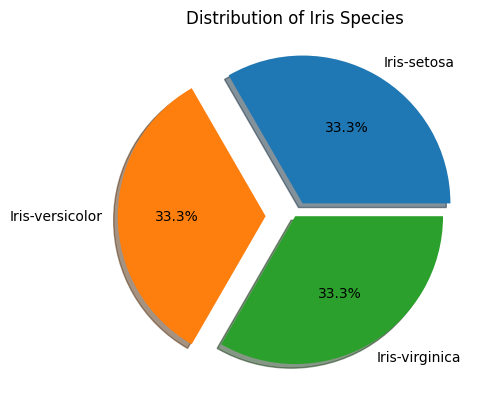

In [10]:
species_counts = df['class'].value_counts()
breakPi=[0.1,0.2,0]
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%',explode=breakPi,shadow=True)
plt.title('Distribution of Iris Species')
plt.show()

In [29]:
x=df.iloc[:,:-2]
y=df['target']

In [31]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifer=DecisionTreeClassifier()

In [34]:
classifer.fit(x_train,y_train)

DecisionTreeClassifier()

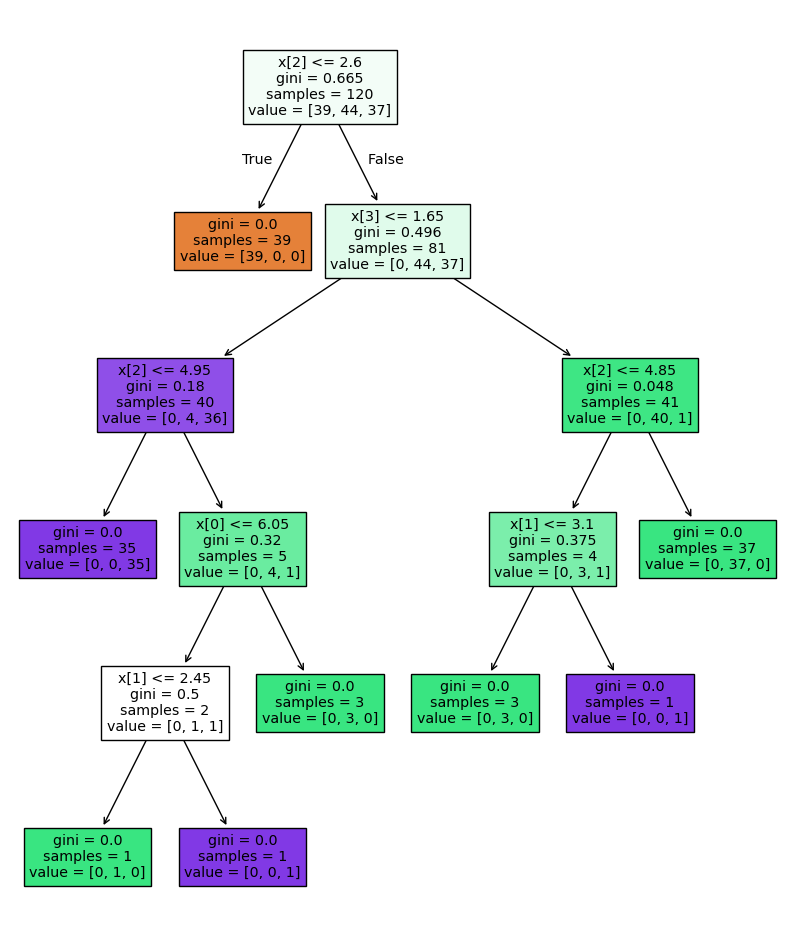

In [35]:
import sklearn
import sklearn.tree
plt.figure(figsize=(10,12))
plt.title('Decesion Tree Structure')
sklearn.tree.plot_tree(classifer,filled=True)
plt.show()

In [36]:
y_pred_test=classifer.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score, recall_score, classification_report
accuracy = accuracy_score(y_pred_test, y_test)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.9666666666666667


In [39]:
def predict_flower():
    flower_classes = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}
    try:
        sepal_length = float(input("Enter sepal length (cm): "))
        sepal_width = float(input("Enter sepal width (cm): "))
        petal_length = float(input("Enter petal length (cm): "))
        petal_width = float(input("Enter petal width (cm): "))

        if not (0 < sepal_length <= 10):
            raise ValueError("Sepal length must be between 0 and 10 cm.")
        if not (0 < sepal_width <= 10):
            raise ValueError("Sepal width must be between 0 and 10 cm.")
        if not (0 < petal_length <= 10):
            raise ValueError("Petal length must be between 0 and 10 cm.")
        if not (0 < petal_width <= 10):
            raise ValueError("Petal width must be between 0 and 10 cm.")

        input_features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

        prediction = classifer.predict(input_features)[0]

        print(f"Predicted flower type: {flower_classes[prediction]}")

    except ValueError as ve:
        print(f"Input error: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [44]:
predict_flower()

Input error: Sepal length must be between 0 and 10 cm.


In [48]:
import pickle
with open('my_model.pkl', 'wb') as file:
    pickle.dump(classifer, file)

In [49]:
with open('my_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)